<a href="https://colab.research.google.com/github/gluoneros/scikit-learn/blob/main/baloto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Baloto
En esta notebook The draw history of Colombia Baloto Lottery (Baloto and Revancha) since 2017

## 1- Importando datos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/scikit-learn"

In [ ]:
!kaggle datasets download -d jaforero/baloto-colombia

  0% 0.00/10.5k [00:00<?, ?B/s]
100% 10.5k/10.5k [00:00<00:00, 19.8MB/s]


In [ ]:
!unzip baloto-colombia.zip

Archive:  baloto-colombia.zip
  inflating: baloto.csv              
  inflating: revancha.csv            


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('baloto.csv')
df.columns = ['Date', 'C1', 'C2', 'C3', 'C4', 'C5', 'SB']
df.head(10)

,Date,C1,C2,C3,C4,C5,SB
0,4/22/2017,15,28,36,37,41,10
1,4/26/2017,1,2,25,31,33,14
2,4/29/2017,6,19,25,28,36,1
3,5/3/2017,5,6,7,12,37,6
4,5/6/2017,1,20,36,39,43,10
5,5/10/2017,12,19,22,35,38,1
6,5/13/2017,11,19,27,28,37,8
7,5/17/2017,15,21,26,28,36,3
8,5/20/2017,1,11,28,31,41,9
9,5/24/2017,7,22,29,32,41,14


### Borrara la columna de fechas

In [ ]:
datos_numericos = df.iloc[:, 1:6]
datos_numericos

,C1,C2,C3,C4,C5
0,15,28,36,37,41
1,1,2,25,31,33
2,6,19,25,28,36
3,5,6,7,12,37
4,1,20,36,39,43
...,...,...,...,...,...
598,13,14,6,8,22
599,32,35,14,20,12
600,16,36,39,42,23
601,5,33,4,12,24


### Transformar los datos en un aaray

In [ ]:
# Ahora necesitamos aplanar estos datos en una sola columna
datos_numericos_aplanados = datos_numericos.values.flatten()
datos_numericos_aplanados

array([15, 28, 36, ..., 35, 24, 36])

### Histograma de la ocurrencia de los datos

<ipython-input-54-ff49be517a62>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=datos_numericos_aplanados, palette='set2', bins=43)


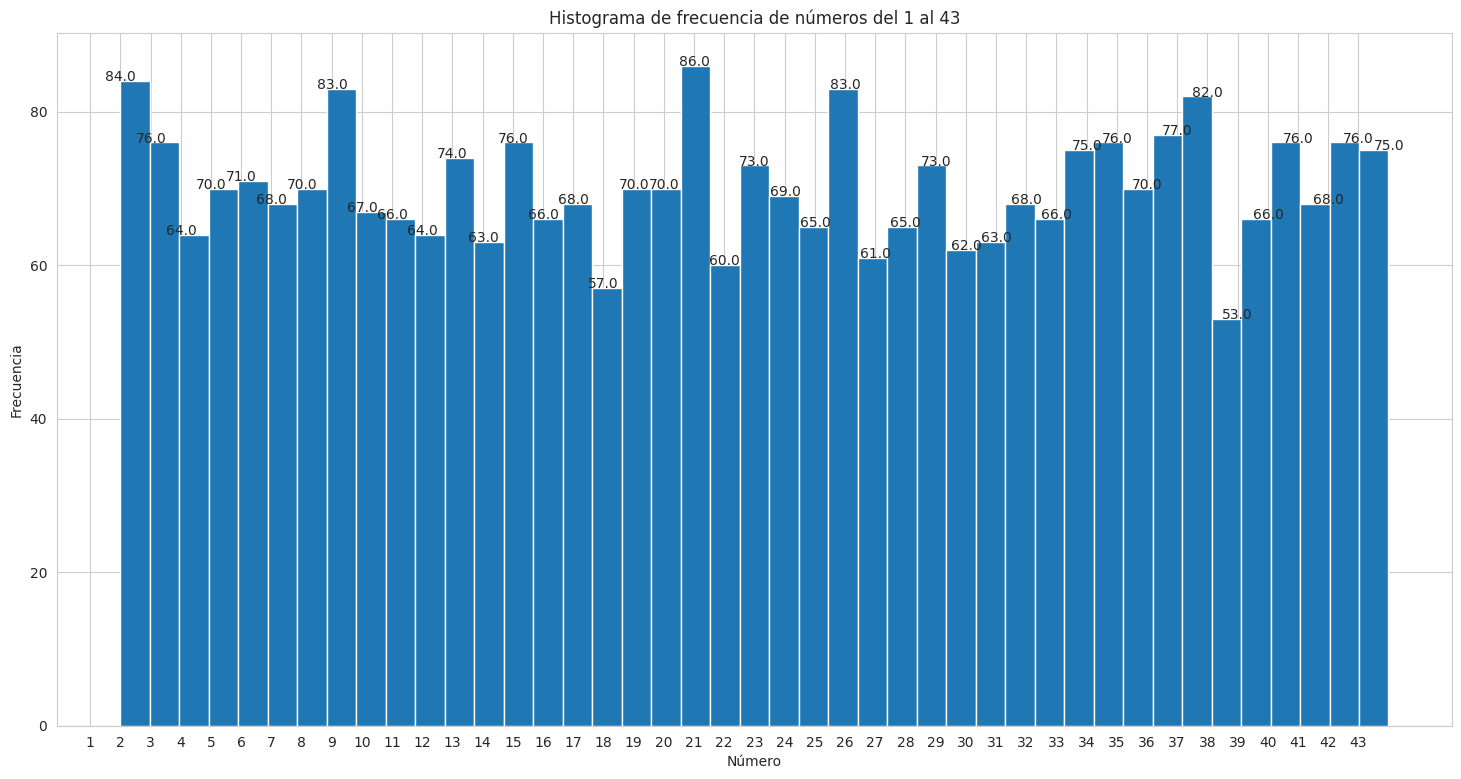

In [ ]:
#datos_numericos = df.iloc[:, 1:]

sns.set_style('whitegrid')
plt.figure(figsize=(18, 9))
sns.histplot(x=datos_numericos_aplanados, palette='set2', bins=43)

conteos = plt.hist(datos_numericos_aplanados, bins=43)[0]

# Etiqueta las barras con el valor de ocurrencia
for i, conteo in enumerate(conteos):
    plt.text(i + 0.5, conteo, f'{conteo}')

plt.xticks(range(43), range(1, 44))

plt.title('Histograma de frecuencia de números del 1 al 43')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()

## Entendiendo los datos
Una vez descargados los dan***.

In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Una vez que vemos cómo están correlacionadas las variables de manera visual, es importante usar un método numérico para poder entender las correlaciones.

In [ ]:
balotas = df.iloc[:, 1:6].values
superbalota = df.iloc[:, -1].values

## Creando el modelo con scikit-learn

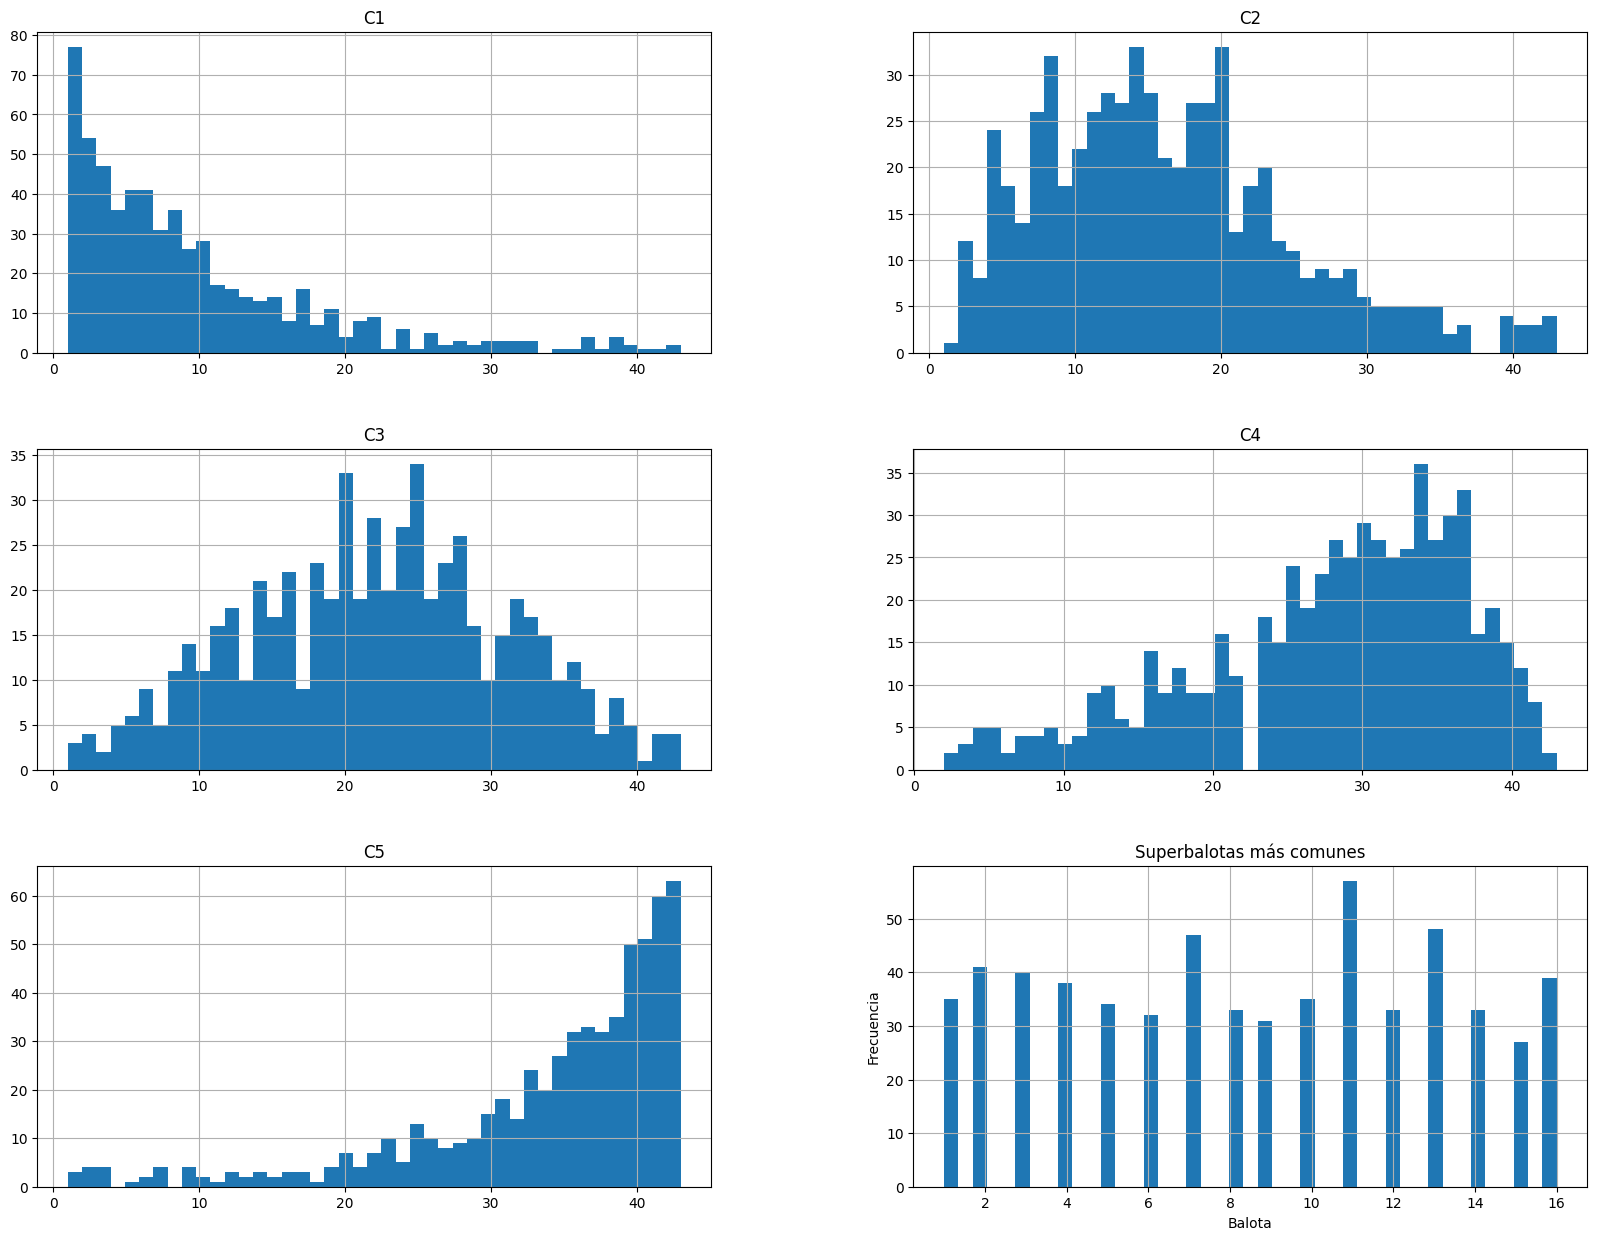

In [ ]:
import numpy as np # Libreria de Python utilizada para trabajar con matrices
import pandas as pd # Libreria de Python para manipulación y análisis de datos
import matplotlib.pyplot as plt # Libreria completa para crear visualizaciones estáticas, animadas e interactivas en Python

df.hist(bins=43, figsize=(20,15))
plt.title("Superbalotas más comunes")
plt.xlabel("Balota")
plt.ylabel("Frecuencia")
plt.show()

## Análisis de resultados

In [ ]:
nmp = df.to_numpy()

<Axes: ylabel='Count'>

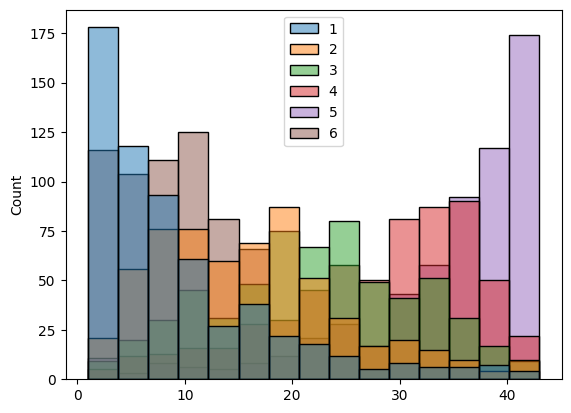

In [ ]:
import seaborn as sns

#sns.displot(df)
sns.histplot(nmp)

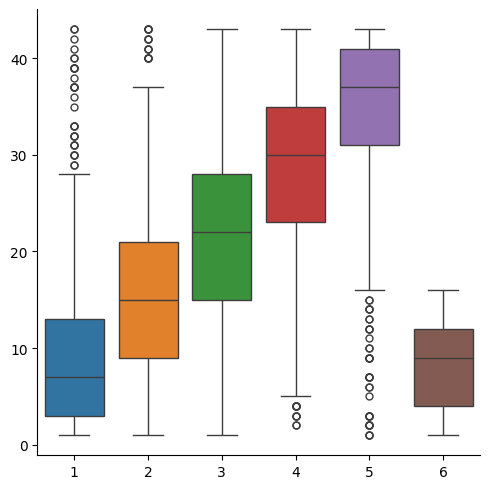

In [ ]:
sns.catplot(data=nmp, kind="box")

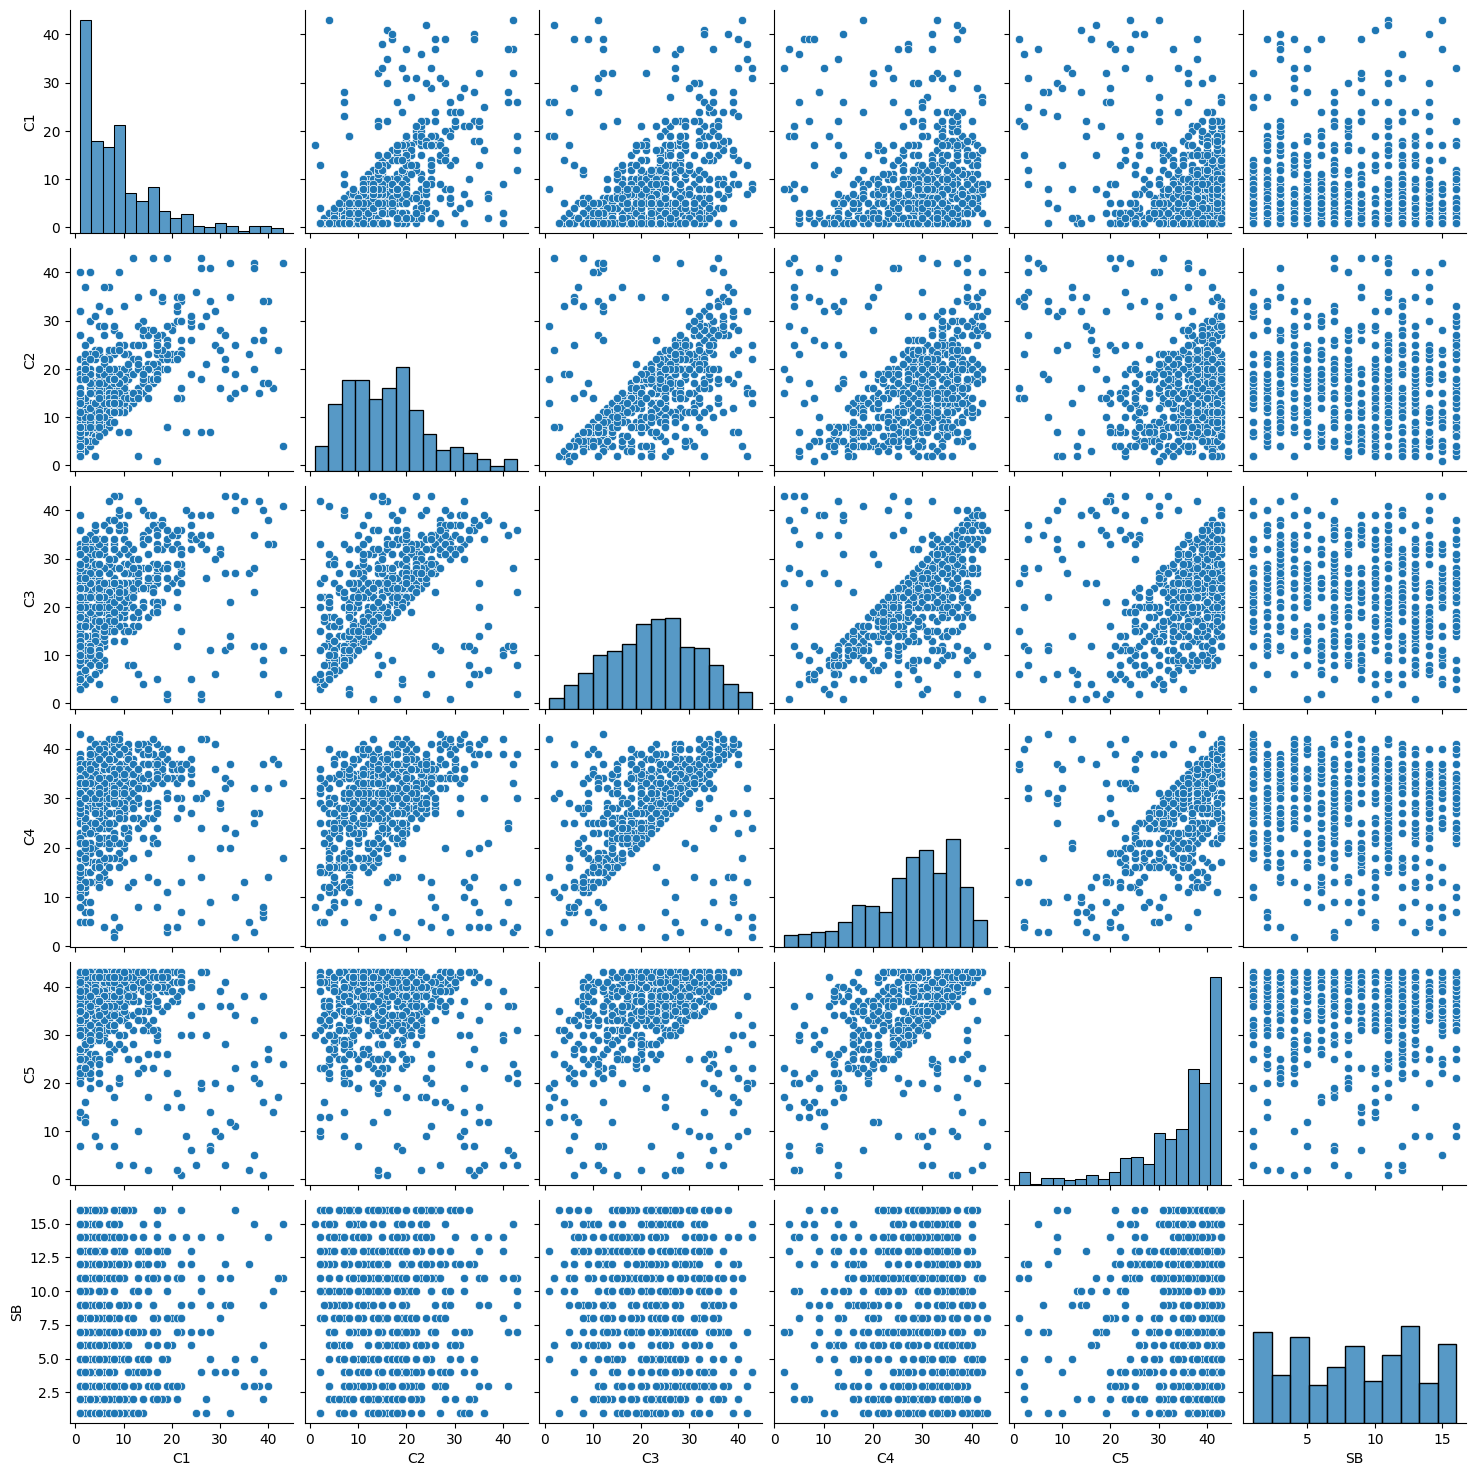

In [ ]:
sns.distplot(df);

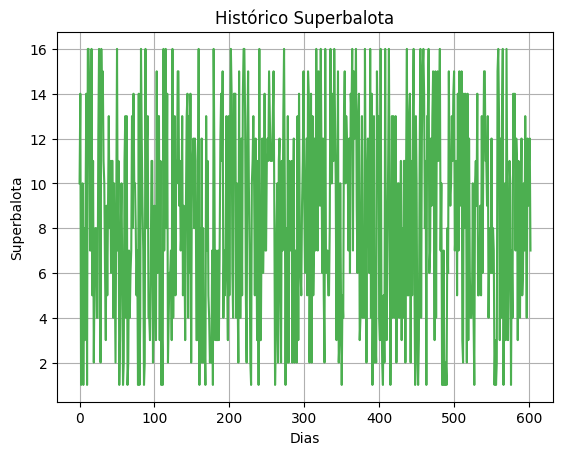

In [ ]:
plt.plot(range(len(superbalota)), superbalota, c = '#4CAF50')
plt.title("Histórico Superbalota")
plt.xlabel("Dias")
plt.ylabel("Superbalota")
plt.grid()
plt.show()

## Generando predicción con el modelo

## Modelo con mas dtos

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Baloto.csv to Baloto.csv


In [ ]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#df2 = pd.read_csv(io.BytesIO(uploaded['Baloto.csv']))
#print(df2)

df2 = pd.read_csv('Baloto.csv')
df2.columns = ['Date', 'C1', 'C2', 'C3', 'C4', 'C5', 'SB']
df2.tail(10)


,Date,C1,C2,C3,C4,C5,SB
2323,31.03.2001,1,6,13,18,25,41
2324,24.03.2001,4,19,25,28,39,41
2325,17.03.2001,5,14,18,38,40,45
2326,10.03.2001,1,12,22,29,31,33
2327,03.03.2001,17,21,26,31,39,40
2328,24.02.2001,3,6,16,22,38,44
2329,17.02.2001,15,20,21,29,32,44
2330,10.02.2001,11,13,27,30,32,39
2331,03.02.2001,1,2,11,15,32,34
2332,27.01.2001,1,2,5,20,27,33


In [ ]:
datos_numericos2 = df2.iloc[:, 1:6]
datos_numericos2

,C1,C2,C3,C4,C5
0,10,15,19,21,41
1,2,20,25,36,41
2,13,20,24,30,42
3,2,3,10,21,23
4,6,29,32,39,43
...,...,...,...,...,...
2328,3,6,16,22,38
2329,15,20,21,29,32
2330,11,13,27,30,32
2331,1,2,11,15,32


In [ ]:
# Ahora necesitamos aplanar estos datos en una sola columna
datos_numericos_aplanados2 = datos_numericos2.values.flatten()
datos_numericos_aplanados2

array([10, 15, 19, ...,  5, 20, 27])

<ipython-input-47-2ee4c3c9ebf7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=datos_numericos_aplanados2, palette='Set2', legend='false')


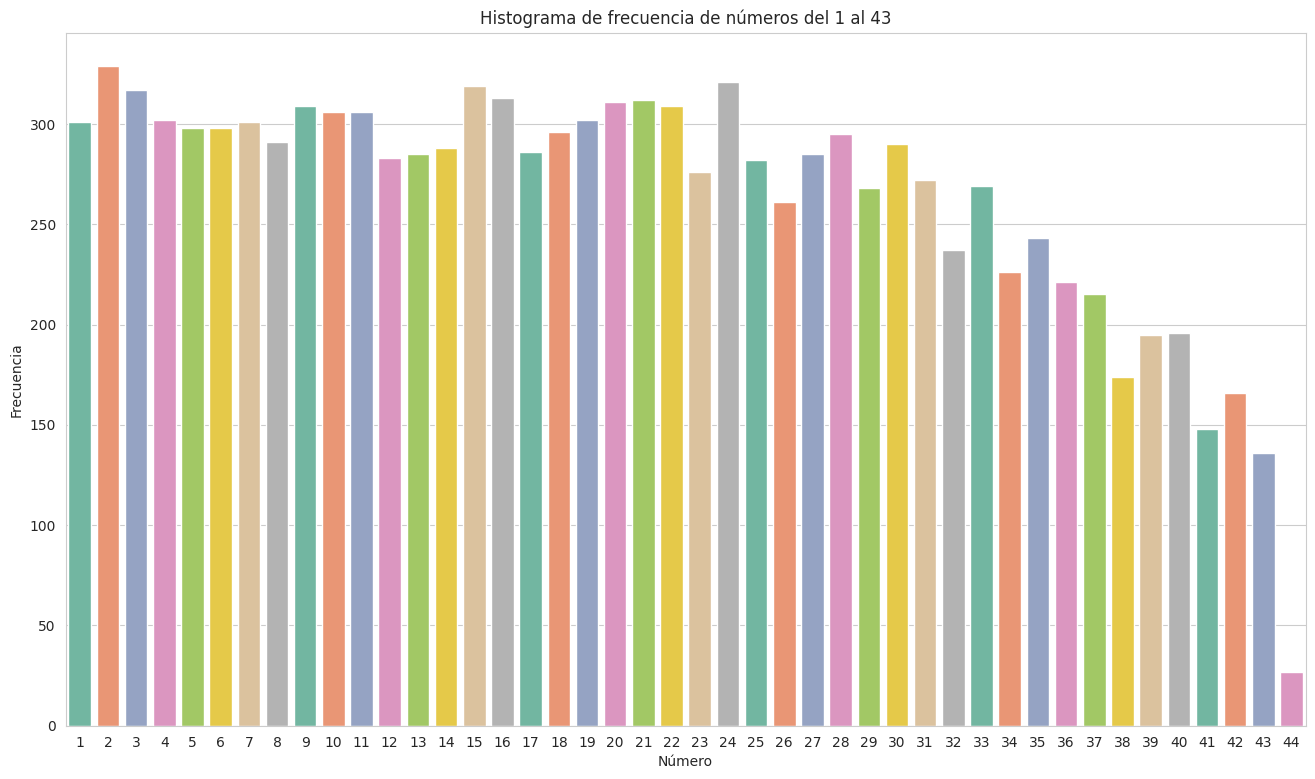

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16, 9))
sns.countplot(x=datos_numericos_aplanados2, palette='Set2', legend='false')
plt.title('Histograma de frecuencia de números del 1 al 43')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()